# CarND Behavioral Cloning Project

This project is about training a neural network to drive a car on a simulator using data recorded from a humman driver.

This notebook will be used to create the model to be used in driving the car on the simulator.

The inputs come in three images right, central and left cameras.

The first thing to do is to clean, then oganize the dataset, and save it to pickle file. for posterior use.

The file driving_log.csv contains steering angles and the left, right and center images associated to it.

In [1]:
import pickle
import csv
import numpy as np
import cv2

In [2]:
path_to_replace = "C:\\Users\\eduardo\\Documents\\SelfDrivingCar\\simulator-windows-64\\"

def ReplaceWrongPath(value):
    return value.replace(path_to_replace, "").replace("\\", "/").replace(" data", "data")

center_imgs = []
left_imgs = []
right_imgs = []
labels = []

with open('./data/driving_log.csv', 'r') as csvfile:
    csv_reader = csv.reader(csvfile)
    for row in csv_reader:
        
        b,g,r = cv2.split(cv2.imread('./' + ReplaceWrongPath(row[0])))
        center_imgs.append(np.array(cv2.merge([r,g,b])))
        b,g,r = cv2.split(cv2.imread('./' + ReplaceWrongPath(row[1])))
        left_imgs.append(np.array(cv2.merge([r,g,b])))
        b,g,r = cv2.split(cv2.imread('./' + ReplaceWrongPath(row[2])))
        right_imgs.append(np.array(cv2.merge([r,g,b])))
        labels.append(row[3])
        
pickle.dump({"features_center": center_imgs, "features_left": left_imgs, "features_right": right_imgs, "labels": labels }, 
            open( "driving_data.p", "wb" ))

print("pickling done")

pickling done


### Load data 

In [3]:
training_file = 'driving_data.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)

X_train = train['features_center']
y_train = train['labels']

### Explore data

 -1
3087


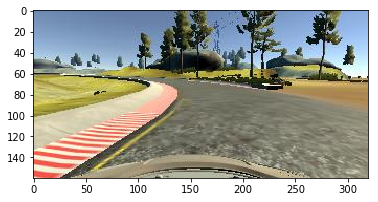

In [4]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

rand_image_index = np.random.randint(0, len(X_train))
#plt.figure(figsize=(1,1))
plt.imshow(X_train[rand_image_index].squeeze(), cmap='gray')
print(y_train[rand_image_index])
print(rand_image_index)


### Normalize

In [5]:
def Normalize(image_data):
    a = 0.1
    b = 0.9
    img_min = 0
    img_max = 255
    return a + ( ( (image_data - img_min)*(b - a) )/( img_max - img_min ) )
    
X_train = Normalize(X_train) 

print("Min", np.min(X_train))
print("Max", np.max(X_train))
print("Std", np.std(X_train))

TypeError: unsupported operand type(s) for -: 'list' and 'int'


### Split train and validation

In [ ]:
from sklearn.model_selection import train_test_split

X_train_copy, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Model

#### VGG with drop out, batch normalition

#### 20 EPOCHS Adam optimizer linear regression

#### Validation
